# Prosper Loan Explorative Analysis
## by Banji R. Owabumoye

## Introduction
---

This project is based on [Prosper](https://www.prosper.com/). Prosper is an online loan company founded in the year 2005. The company offers a variety of resources people can use to try and improve their financial health, regardless of their financial situation.

The dataset comprises 113,937 rows on individual loan with 81 variables (columns). The dataset will be assessed, cleaned, and visualized using univariate, bivariate and multivariate charts.

[_Numpy_](https://numpy.org/) and [_Pandas_](https://pandas.pydata.org/) packages will be used for data wrangling, analysis, and manipulation while [_Matplotlib_](https://matplotlib.org/) and [_Seaborn_](https://seaborn.pydata.org/) packages will be used for plotting charts.

The main objectives of this project are to 
- consider factors affecting loan's outcome status. 
- examine determinant factors loan amount is based.
- examine factors determinant to investors' decision.


## Preliminary Wrangling
-----
The dataset was mannually downlaoded from the [link](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1664677502568106&usg=AOvVaw2NFvlV3DRAyei3gQ3t1oDM) provided by Udacity. Visual and programmatic assessments will be performed that will lead to selection of needed variables from the dataset and some variables will be derived from existing variables through transformation.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline

### Loading Dataset, and Examining Interested Features


In [6]:
# Loading dataset with pandas
loan = pd.read_csv('prosperLoanData.csv')

In [7]:
# Knowing number of rows and columns of dataset
print('The dataset comprises {:,}'.format(loan.shape[0]), 'rows, and', loan.shape[1], 'columns' )

print('--' * 62) # seperating line 

# summarized details of the dataset
print(loan.info())

print('--' * 62) # seperating line

# To randomly view 5 rows of the dataset
loan.sample(5)

The dataset comprises 113,937 rows, and 81 columns
----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                   

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
41056,44C43601631165849DDF77C,1179500,2014-02-05 07:50:46.363000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
11795,05693403254095617B8CAD3,222452,2007-10-28 14:10:28.577000000,A,36,Completed,2007-12-04 00:00:00,0.10441,0.0975,0.0925,...,-1.25,0.0,0.00,0.00,0.0,1.0,1,1,200.0,128
48779,91A034163460207526B9258,302066,2008-03-31 09:03:26.940000000,E,36,Completed,2011-04-15 00:00:00,0.24891,0.2300,0.2200,...,-51.41,0.0,0.00,0.00,0.0,1.0,0,0,0.0,98
108733,22853550294254552998506,601448,2012-06-19 06:05:00.017000000,NaN,36,Chargedoff,2012-12-26 00:00:00,0.28851,0.2499,0.2399,...,-10.27,0.0,12259.82,12259.82,0.0,1.0,0,0,0.0,179
43084,7F2A336475395646076D123,29636,2006-08-07 14:47:55.740000000,AA,36,Completed,2006-10-16 00:00:00,0.08684,0.0800,0.0750,...,-3.12,0.0,0.00,0.00,0.0,1.0,0,0,0.0,35


### Dataset structure

There are 113,937 borrowers and 81 features pertaining the borrowers and their loan performance. 


### Main features of interest in the dataset

Some key listed features used for this project are based on information about the borrowers and their loan performance.

**ProsperRating(Alpha):** Prosper rating between HR - AA

**ProsperScore:** A customer risk score between 1 the highest risk and  10 the lowest risk

**IncomeRange:** Borrower's income range

**LoanOriginalAmount:** The original amount of loan

**AmountDelinquent:** Dollars delinquent when credit profile was pulled

**EmploymentStatus:** The employment status of the borrower

**StatedMonthlyIncome:** The monthly income stated by the borrower

**BorrowerRate:** The Borrower's interest rate

**IsBorrowerHomeowner:** Borrower with mortgage credit profile or home document

**ListingCreationDate:** The date the listing was created

### Data assessment and cleaning

The dataset will be assessed visually and programmatically. After which quality and structural issues observed will be cleaned.
Firstly, features needed to achieve the objectives of this project will be extracted  from the main dataset next. 

In [8]:
# List of variables needed for the project
selected_variables = ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
           'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
           'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'AmountDelinquent','IncomeRange',
           'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount',
           'Recommendations','Investors']

In [9]:
# assigning the selected variables
loan_df = loan[selected_variables]

# To see top 5 rows of the selected variables
loan_df.head(5)

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,Recommendations,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,Other,Self-employed,True,472.0,"$25,000-49,999",3083.333333,0,9425,0,258
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,A,7.0,2,CO,Professional,Employed,False,0.0,"$50,000-74,999",6125.000000,0,10000,0,1
2,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,Other,Not available,False,NaN,Not displayed,2083.333333,0,3001,0,41
3,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,A,9.0,16,GA,Skilled Labor,Employed,True,10056.0,"$25,000-49,999",2875.000000,0,10000,0,158
4,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,D,4.0,2,MN,Executive,Employed,True,0.0,"$100,000+",9583.333333,0,15000,0,20


In [10]:
# loan_df dataframe details
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
AmountDelinquent             106315 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
LoanCurrentDaysDelinquent    113937 non-null int64
LoanOriginalAmount           113937 non-null int64
Recommen

From the dataframe info, it is seen that some variables are having null or missing values. Also, Some dataypes are wrong or will need modification to be useful for this project. The next task is to know the exact number of variables having rows will null.  

In [11]:
# Columns with null values
loan_df.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
AmountDelinquent              7622
IncomeRange                      0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
Recommendations                  0
Investors                        0
dtype: int64

It can now be seen that 7 variables are having null values. With the minimum been 25 rows and maximum been 29,084 rows. The maximum is approximately 26% of the total rows of the dataset. Next is to check for duplicated rows.

In [12]:
# Checking for duplicates
loan_df.duplicated().sum()

0

It is good that their are no duplicates. I will now list all the observed quality and structural issues needed to be cleaned for various analyses to run smoothly.   

### Observed Issues
---
  
> 1. ListingCreationDate is object datatype instead of datetime.    
> 2. Year, month, and day-name can be extracted from ListingCreationDate variable and become ordered new variables. 
> 3. 'Not employed' and '0' values in IncomeRange variable mean the same    
> 4. 'Not displayed' value will not be needed in IncomeRange variable.
> 5. IncomeRange values should be more descriptive and be ordered.   
> 6. BorrowerState variable contains state codes that are not easy to understand.
> 7. Values of 'ProsperRating (Alpha)', 'IncomeCategory', 'ListingCreationDay', and 'ListingCreationMonth' variables not ordered. 
> 8. Seven variables (BorrowerAPR, ProsperRating (Alpha), ProsperScore, BorrowerState, Occupation, EmploymentStatus, AmountDelinquent) are having null values.
> 9. Save the clean dataframe to csv 


### Data Cleaning
---
I will start by creating a copy of the dataframe; loan_df. Thereafter, I will attempt to clean all the observed issues appropriately.

In [13]:
# copying loan_df dataframe
clean_loan = loan_df.copy()

#check few rows of clean_loan
clean_loan.head(2)

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,Recommendations,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.158,NaN,NaN,0,CO,Other,Self-employed,True,472.0,"$25,000-49,999",3083.333333,0,9425,0,258
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.092,A,7.0,2,CO,Professional,Employed,False,0.0,"$50,000-74,999",6125.000000,0,10000,0,1


**1. ListingCreationDate will be changed from object to datetime**

In [14]:
# converting ListingCreationDate to datetime
clean_loan.loc[:,'ListingCreationDate'] = pd.to_datetime(clean_loan['ListingCreationDate'], format='%Y-%m-%d')

# confirming the change
clean_loan.dtypes[0:1]

ListingCreationDate    datetime64[ns]
dtype: object

 **2. extract year, month, and day from ListingCreationDate**

In [15]:
# Creating column for year
clean_loan.loc[:,'ListingCreationYear'] = clean_loan['ListingCreationDate'].dt.year

# Creating column for month 
clean_loan.loc[:,'ListingCreationMonth'] = clean_loan['ListingCreationDate'].dt.month_name()

# Creating column for day-name
clean_loan.loc[:,'ListingCreationDay'] = clean_loan['ListingCreationDate'].dt.day_name()


# Confirming the new columns created
clean_loan[['ListingCreationYear','ListingCreationMonth','ListingCreationDay']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 3 columns):
ListingCreationYear     113937 non-null int64
ListingCreationMonth    113937 non-null object
ListingCreationDay      113937 non-null object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


**3. Change IncomeRange variable value 'Not employed' to '$0'** 

In [16]:
# changing of 'Not employed value to $0
clean_loan.loc[:,'IncomeRange'] = clean_loan['IncomeRange'].str.replace('Not employed', '$0')

# Confirming the change
clean_loan.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

**4. 'Not displayed value in IncomeRange will be changed to Nan**

In [17]:
# Changing Not displayed value to Nan
clean_loan.loc[:,'IncomeRange'] = clean_loan['IncomeRange'].replace('Not displayed', np.nan)

# Confirming the change
clean_loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

**5. IncomeRange values will be changed to descriptive words**

In [18]:
# change incomeRange values to a qualitative or descriptive category
category = {'$0':'No-income', '$1-24,999':'Very-low',
            '$25,000-49,999':'Low','$50,000-74,999':'Average',
            '$75,000-99,999':'High', '$100,000+':'Very-high'}

# Create another column that would contain the descriptive categoric values
clean_loan.loc[:,'IncomeCategory'] = clean_loan['IncomeRange'].map(category)

# Confirming the change
clean_loan.IncomeCategory.value_counts()

Low          32192
Average      31050
Very-high    17337
High         16916
Very-low      7274
No-income     1427
Name: IncomeCategory, dtype: int64

**6. Full name of the states will be added to the dataframe as column**

In [19]:
states = {
    'AK':'Alaska',
    'AL':'Alabama',
    'AR':'Arkansas',
    'AZ':'Arizona',
    'CA':'California',
    'CO':'Colorado',
    'CT':'Connecticut',
    'DC':'District of Columbia',
    'DE':'Delaware',
    'FL':'Florida',
    'GA':'Georgia',
    'HI':'Hawaii',
    'IA':'Iowa',
    'ID':'Idaho',
    'IL':'Illinois',
    'IN':'Indiana',
    'KS':'Kansas',
    'KY':'Kentucky',
    'LA':'Louisiana',
    'MA':'Massachusetts',
    'MD':'Maryland',
    'ME':'Maine',
    'MI':'Michigan',
    'MN':'Minnesota',
    'MO':'Missouri',
    'MS':'Mississippi',
    'MT':'Montana',
    'NC':'North Carolina',
    'ND':'North Dakota',
    'NE':'Nebraska',
    'NH':'New Hampshire',
    'NJ':'New Jersey',
    'NM':'New Mexico',
    'NV':'Nevada',
    'NY':'New York',
    'OH':'Ohio',
    'OK':'Oklahoma',
    'OR':'Oregon',
    'PA':'Pennsylvania',
    'RI':'Rhode Island',
    'SC':'South Carolina',
    'SD':'South Dakota',
    'TN':'Tennessee',
    'TX':'Texas',
    'UT':'Utah',
    'VA':'Virginia',
    'VT':'Vermont',
    'WA':'Washington',
    'WI':'Wisconsin',
    'WV':'West Virginia',
    'WY':'Wyoming'
}

In [20]:
# Creating new column that will contain all the states full name
clean_loan.loc[:,'State'] = loan_df['BorrowerState'].map(states)

# Confirm the new column and values
clean_loan.State.sample(5)

28726     Illinois
109443    Kentucky
74966         Ohio
33187     Missouri
92696         Ohio
Name: State, dtype: object

**7. 'ProsperRating (Alpha)', 'IncomeCategory', 'ListingCreationDay', and 'ListingCreationMonth' values will be made categorical**

In [21]:
#categorizing values in 'ProsperRating (Alpha)', 'IncomeCategory', 'ListingCreationDay', and 'ListingCreationMonth' variables
order = {'ProsperRating (Alpha)':['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
         'IncomeCategory':['No-income','Very-low','Low','Average', 'High','Very-high'],
        'ListingCreationDay':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
        'ListingCreationMonth':['January','February','March','April','May','June','July','August',
                                'September','October','November','December']}

for i, v in order.items():
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = v)    
    clean_loan[i] = clean_loan[i].astype(ordered_var)

    
# Confirming the changes
clean_loan[['ProsperRating (Alpha)','IncomeCategory','ListingCreationDay','ListingCreationMonth']].dtypes

ProsperRating (Alpha)    category
IncomeCategory           category
ListingCreationDay       category
ListingCreationMonth     category
dtype: object

**8.. Null values in the dataframe will be dropped**

In [22]:
# Dropping null rows
clean_loan = clean_loan.dropna(how = 'any', axis = 0)

# Checking for null values
display(clean_loan.isna().sum())

print('**' * 62) # demarcation line

display(clean_loan.info())

ListingCreationDate          0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
IsBorrowerHomeowner          0
AmountDelinquent             0
IncomeRange                  0
StatedMonthlyIncome          0
LoanCurrentDaysDelinquent    0
LoanOriginalAmount           0
Recommendations              0
Investors                    0
ListingCreationYear          0
ListingCreationMonth         0
ListingCreationDay           0
IncomeCategory               0
State                        0
dtype: int64

****************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 24 columns):
ListingCreationDate          83520 non-null datetime64[ns]
Term                         83520 non-null int64
LoanStatus                   83520 non-null object
BorrowerAPR                  83520 non-null float64
BorrowerRate                 83520 non-null float64
ProsperRating (Alpha)        83520 non-null category
ProsperScore                 83520 non-null float64
ListingCategory (numeric)    83520 non-null int64
BorrowerState                83520 non-null object
Occupation                   83520 non-null object
EmploymentStatus             83520 non-null object
IsBorrowerHomeowner          83520 non-null bool
AmountDelinquent             83520 non-null float64
IncomeRange                  83520 non-null object
StatedMonthlyIncome          83520 non-nu

None

**9. Save clean_loan dataframe to csv and be named prosper_loan**

In [23]:
# Saving clean_loan dataframe as csv file
clean_loan.to_csv('prosper_loan.csv', index = False)

# Loading prosper_loan csv 
prosper_loan = pd.read_csv('prosper_loan.csv')

# checking the first 2 rows of prosper_loan dataframe
prosper_loan.head(2)

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,...,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,Recommendations,Investors,ListingCreationYear,ListingCreationMonth,ListingCreationDay,IncomeCategory,State
0,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,A,7.0,2,CO,Professional,...,6125.0,0,10000,0,1,2014,February,Thursday,Average,Colorado
1,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,A,9.0,16,GA,Skilled Labor,...,2875.0,0,10000,0,158,2012,October,Monday,Low,Georgia


All the structural and quality issues observed and listed were cleaned. At the end, the rows of the dataframe were reduced from 113,937 to 83,520 rows, which is approximately 27% reduction.
Since the data is now clean and additional needed variables derived, I will now start the analysis with univariate exploration. 

## Univariate Exploration
---

### Question 1
> What is the distribution of listed borrowers by years, months, and days?

### Visualization

To find solution to question 1, I have to categorize the required variables again in order to have visualizations that are easy to read.

In [24]:
#categorizing values in 'ProsperRating (Alpha)', 'IncomeCategory', 'ListingCreationDay', and 'ListingCreationMonth' variables
order = {'ProsperRating (Alpha)':['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
         'IncomeCategory':['No-income','Very-low','Low','Average', 'High','Very-high'],
        'ListingCreationDay':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
        'ListingCreationMonth':['January','February','March','April','May','June','July','August',
                                'September','October','November','December']}
# Looping the variables to be converted to categorical variables
for i, v in order.items():
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = v)    
    prosper_loan[i] = prosper_loan[i].astype(ordered_var)

    
# Confirming the changes
prosper_loan[['ProsperRating (Alpha)','IncomeCategory','ListingCreationDay','ListingCreationMonth']].dtypes

ProsperRating (Alpha)    category
IncomeCategory           category
ListingCreationDay       category
ListingCreationMonth     category
dtype: object

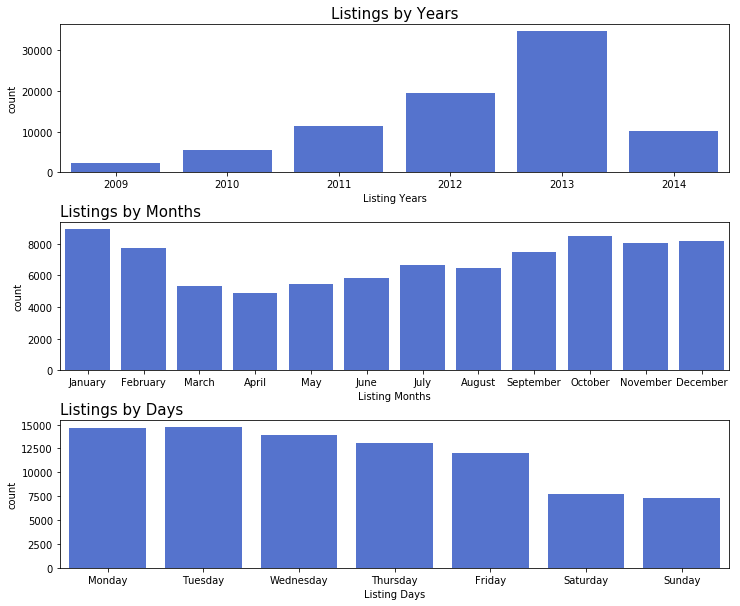

In [25]:
# defining function for bar chart visualizations
def date_cat():
    """ploting of bar charts to reveal how borrowers were 
    listed by year, month, and day    
    """
    color = 'royalblue'
    
    fig, ax = plt.subplots(nrows = 3, figsize = [12, 10])
    fig.subplots_adjust(hspace=0.335, wspace=0.335)
  
    sb.countplot(data = prosper_loan, 
                 x = 'ListingCreationYear',color = color, ax =ax[0])
    sb.countplot(data = prosper_loan, 
                 x = 'ListingCreationMonth',color = color,ax =ax[1])
    sb.countplot(data = prosper_loan, 
                 x = 'ListingCreationDay',color = color,ax =ax[2])
 
    ax[0].set_xlabel('Listing Years')
    ax[0].set_title('Listings by Years', size = 15)
    ax[1].set_xlabel('Listing Months')
    ax[1].set_title('Listings by Months', size = 15, loc = 'left')
    ax[2].set_xlabel('Listing Days')
    ax[2].set_title('Listings by Days', size = 15, loc = 'left')

date_cat()

### Observations

> - Listed borrowers maintained an upward trend from year 2009, 2010, 2011, 2012, and got to the peak in 2013. The unusual decline recorded in 2014 is due to the fact that the dataset lastest date was March, 2014. With the uptrend recorded, there is high possibility that borrowers listed in year 2014 will be the highest. This simple analysis means that Prosper increases in capacity along the years.

> - In relation to months, Prosper is quite busier listing borrowers in September, October, November, and December than other months, most especially in the month of April.

> - Prosper is an online loan platform which might lead to assumption that days of the week will not be a factor when it comes to listing of borrowers. However, opposite is the case. Monday and Tuesday recorded the highest number of listed borrowers, and the trend moved downward gently to wednesday, Thursday and Friday. A sharp drop was recorded on Saturday and Sunday.

Examining distribution of borrowers accross the states of USA will be an interesting analysis to embark on next.

### Question 2
> What is the distribution of borrowers accross states?

### Visualization

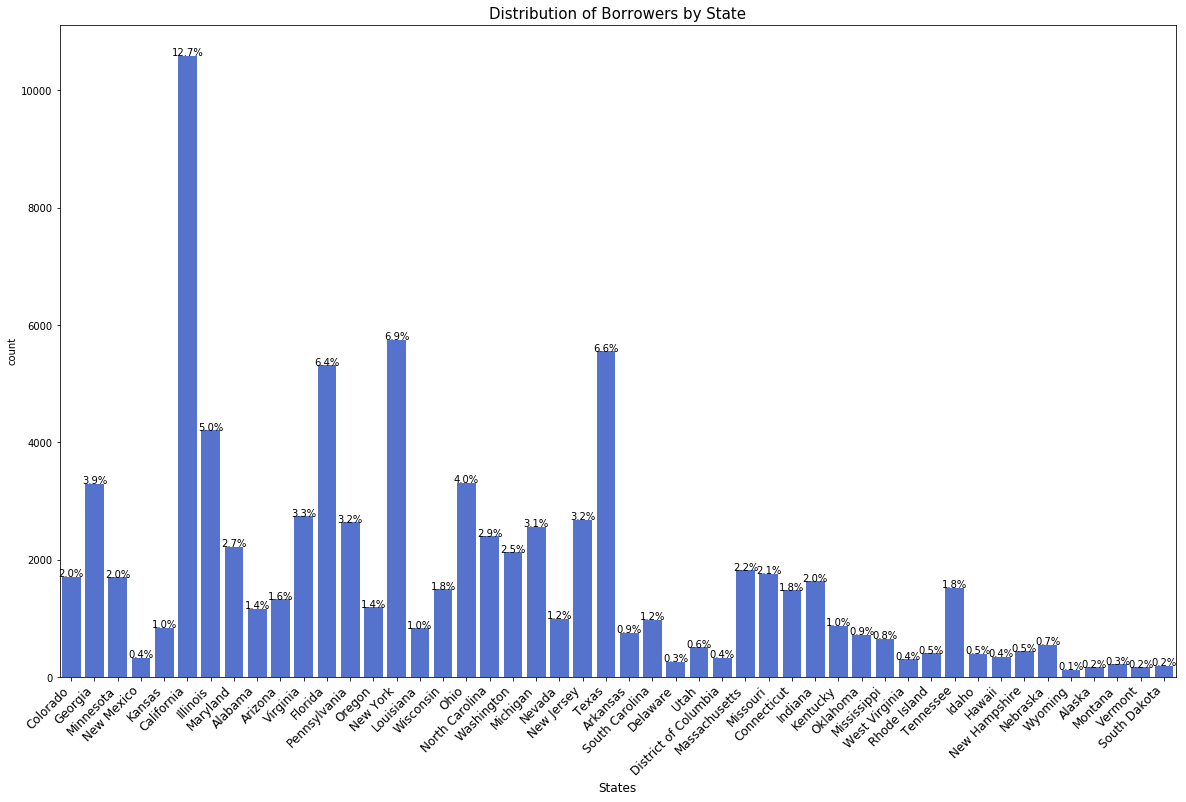

In [46]:
# Looking at the distribution of borrowers in accross states

color = 'royalblue'

ax = sb.countplot(data = prosper_loan, x = 'State', color = color)
plt.xlabel('States', size = 12)
plt.xticks(rotation = 90, horizontalalignment='right', size = 12)
plt.title('Distribution of Borrowers by State', size = 15)

    
df_size = prosper_loan['State'].shape[0]

type_counts = prosper_loan['State'].value_counts()

locs, labels = plt.xticks(rotation = 45, horizontalalignment='right')
    
# Placing percentage value on each bar
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count/df_size)
    
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', size = 10)
 
    rcParams['figure.figsize'] = 20, 12;

### Observations
> - Highest number of borrowers came from California in Far West which is the location of the company with 12.7%, followed by New York almost in the Far East with 6.9%, Texas located in Southwest has 6.6%, Florida found at the horn in Southeast with 6.4%, and Illinois located around the Great Lakes 5.0%. States with lowest borrowers are Wyoming around the Rocky Mountains in the North (0.1%), Alaska located in Far West (0.2%), South Dakota in the plains (0.2%), Vermont located in New England (0.2%), and Montana a border state in the North (0.3%) respectively.
Borrowers are well distributed accross the country, which means locational base of the company has little influence only on California, which is the base of the company.


If location is not a factor affecting loan's outcome status nor loan amount, it is important to look at some other factors like employment status and socio-economic status of borrowers in the next analysis

### Question 3
> What is the socio-economic status of the borrowers?

### Visualization

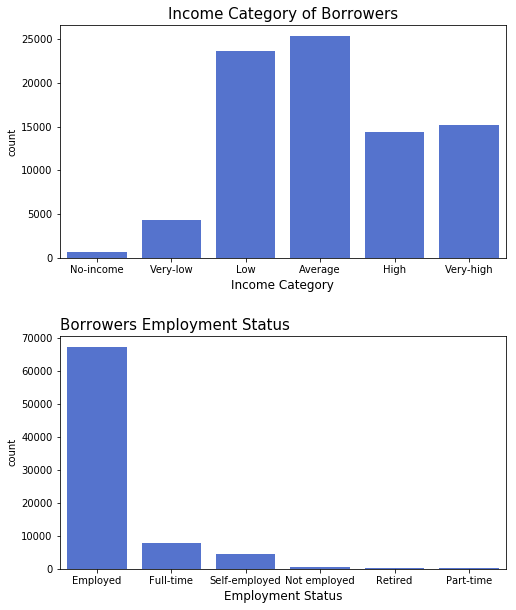

In [27]:
# Function for bar charts
def status_cat():
    """ploting of bar charts for income-category, and employment status    
    """
    color = 'royalblue'
    
    fig, ax = plt.subplots(nrows = 2, figsize = [8, 10])
    fig.subplots_adjust(hspace=0.335, wspace=0.335)
  
    sb.countplot(data = prosper_loan, 
                 x = 'IncomeCategory',color = color, ax = ax[0])
    
    sb.countplot(data = prosper_loan.query('EmploymentStatus !="Other"'),
                 x = 'EmploymentStatus', color = color, ax =ax[1])
    
    # Setting the axes labels and title
    ax[0].set_xlabel('Income Category', size = 12)
    ax[0].set_title('Income Category of Borrowers', size = 15)
    ax[1].set_xlabel('Employment Status', size = 12)
    ax[1].set_title('Borrowers Employment Status', size = 15, loc = 'left')

status_cat()

### Observations
> - Income category or income range seems to be an important factor affecting loan's outcome status. Borrowers that are in the categories of 'Low'(25,000-49,999 Dollars) and 'Average'(50,000-74,999 Dollars) are more than other categories. Borrowers with 'No-income' are least considered followed by borrowers in 'Very-low' income category'. Borrowers that are in 'High' and Very-high' income categories are quite above average, possibly because amount of money Prosper loan could offer is below their income status.

> - Employment status is highly important for borrowers to be considered. A potential borrower that is employed on full-time has a very high chance to be listed, followed by those that are self-employed. 
'Not-employed', 'Retired' and 'Part-time' have lesser chance.

At this juncture, I will look into the terms of loan offered by Prosper.

### Question 4
> How do loan terms affect borrowers?

### Visualization

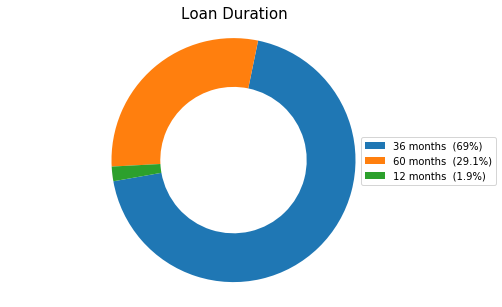

In [28]:
#Plotting doughnut chart
loan_term = prosper_loan.Term.value_counts()

fig = plt.figure(figsize =(8,5))

fig, ax = plt.pie(loan_term, startangle = 190,
        counterclock = True, wedgeprops = {'width':0.4, 'linewidth': .2})
plt.title('Loan Duration', size = 15)

plt.legend(['36 months  (69%)', '60 months  (29.1%)', '12 months  (1.9%)'], 
           bbox_to_anchor = (.85,.5), loc = 'center', bbox_transform = plt.gcf().transFigure,)
plt.gca().axis('equal');

### Observations
> - Borrowers that applied for loan facility of 36 months (3 years) are more likely to be considered compared to short term loan of 12 months (1 year) or long term loan of 60 months (5 years)

> - This might be due to management of investors' want of high profit but low risk tolerance. Loan term of 12 months (1 year) would probably yield lower profit than loan term of 36 months (3 years). Loan term of 60 months (5 years) is a long term loan that many investors would be unwilling to take the risk. Also, long term loan is usually attached to huge sum of loan that only high and very-high income earners could afford.

This will lead to analysing Prosper risk score and Prosper borrowers' rating next

### Question 5
> How does Prosper rate borrowers and score risks?

### Visualization

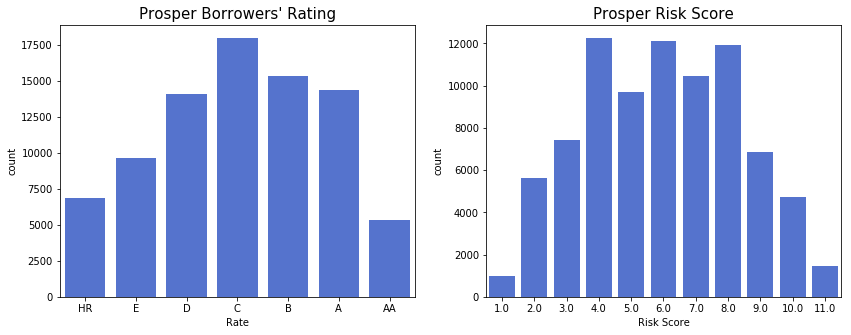

In [29]:
# Prosper loan rate and score charts
plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sb.countplot(data = prosper_loan, x = 'ProsperRating (Alpha)', color = color)
plt.xlabel('Rate')
plt.title("Prosper Borrowers' Rating", size = 15)

plt.subplot(1,2,2)
sb.countplot(data = prosper_loan, x = 'ProsperScore', color = color)
plt.xlabel('Risk Score')
plt.title('Prosper Risk Score', size = 15);

### Observations
> - Prosper rating ranges from the lowest to the highest (HR, E, D, C, B, A, AA) most borrowers are rated  C followed by B, D, and A. Borrowers rated HR stand a lower chance of having a favorable loan outcome status.
> - Prosper risk score determines how risky a loan application is, which is dependent on the loan applicant. Prosper risk score ranges from highest risk (1.0) through lowest risk (11.0). Most borrowers are scored from 4.0 through 8.0.
Borrowers with risk score of 1.0 are less likely to have good loan outcome status a loan amount that is high.

Next analysis will focus on distribution of loan amount given by prosper

### Question 6
> How does monthly income of borrowers distributed?

### Visualization

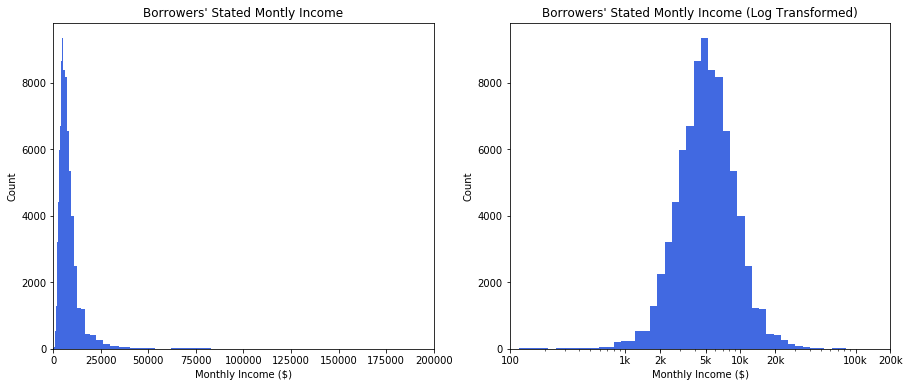

In [30]:
# Distribution of stated montly income
bins = 10 ** np.linspace(0, np.log10(prosper_loan['StatedMonthlyIncome'].max()), 100)

xticks = [100,1000,2000, 5000, 10000, 20000, 100000, 200000]
label = [100, '1k', '2k','5k','10k','20k', '100k','200k']
labels = ['{}'.format(k) for k in label]

plt.figure(figsize =(15,6))

plt.subplot(1,2,1)
plt.hist(data = prosper_loan, x = 'StatedMonthlyIncome', bins = bins, color = color)
plt.xlim(100, 2e5)
plt.xlabel('Monthly Income ($)')
plt.ylabel('Count')
plt.title("Borrowers' Stated Montly Income")


plt.subplot(1,2,2)
plt.hist(data = prosper_loan, x = 'StatedMonthlyIncome', bins = bins, color = color)
plt.xscale('log')
plt.xticks(xticks, labels)
plt.xlim(100, 2e5)
plt.xlabel('Monthly Income ($)')
plt.ylabel('Count')
plt.title("Borrowers' Stated Montly Income (Log Transformed)");

### Observations
> - It's difficult to precisely deduce the distribution of stated monthly income of borrowers from the left chart. This led to the log transformation that resulted to the chart by the right.
Most borrowers are earning around 5,000 dollars, that is between 2,000 dollars and 10,000 dollars. This income range is inline with 'Low' and 'Average income categories.

Is loan amount given inline with stated monthly income of borrowers? Let's find out this.

### Question 7
> What is the distribution of loan amount given?

### Visualization

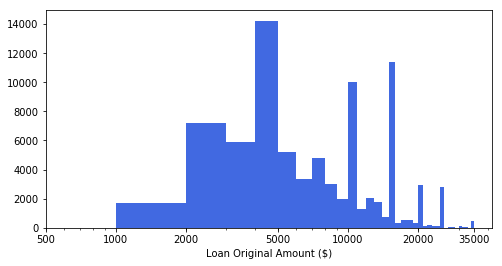

In [31]:
bins = np.arange(prosper_loan.LoanOriginalAmount.min(),
                 prosper_loan.LoanOriginalAmount.max()+ 500, 1000)

xticks = [500, 1000, 2000, 5000, 10000, 20000, 35000]
labels = ['{}'.format(k) for k in xticks]

plt.figure(figsize =(8,4))
plt.hist(data = prosper_loan, x = 'LoanOriginalAmount', bins = bins, color = color)
plt.xscale('log')
plt.xticks(xticks, labels)
plt.xlabel('Loan Original Amount ($)');

### Observations
> - The log transformation used allowed enability to see clearly the amount of loan distributed by Prosper.
The amount of most loan given was  around 5,000 dollars followed by 15,000 dollars, and 10,000 dollars. These amounts of loan match perfectly with borrowers in the income category of 'Low' and 'Average'
This implies that loan application with very low or very high amount might not scale through.

With the distribution of loan original amount known, it will be balanced to also analyse distribution of amount of loan delinquent, next.

### Question 8
> What is the distribution of loan amount delinquent?

### Visualization

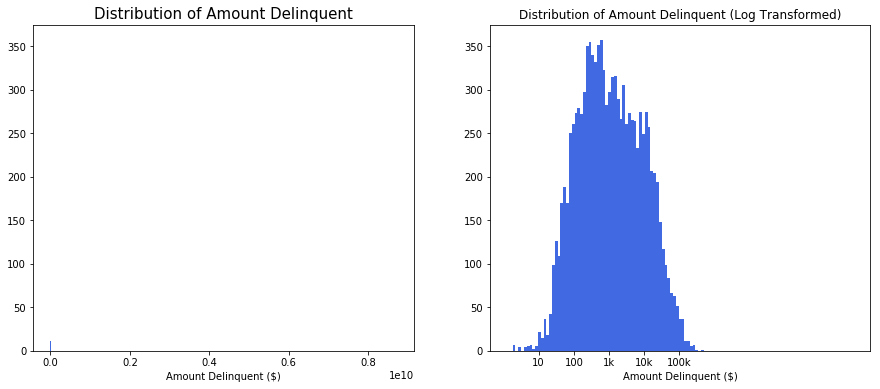

In [32]:
# function for plotting amount delinquent
def amount_delinq():
    """ This function is to plot two histogram charts of amount delinquent.
    The first chart is without transformation while the second chart is log
    transformed"""

    bins = 10** np.arange(.1, 10, .08)

    plt.figure(figsize =(15,6))
    
    plt.subplot(1,2,1)
    plt.hist(data = prosper_loan, x = 'AmountDelinquent', color = color, bins = bins)
    plt.xlabel('Amount Delinquent ($)')
    plt.title('Distribution of Amount Delinquent', size = 15)
    
    plt.subplot(1,2,2)
    plt.hist(data = prosper_loan, x = 'AmountDelinquent', color = color, bins = bins)
    plt.xscale('log')
    plt.xticks([10, 100, 1000, 10000, 100000],['10', '100', '1k', '10k', '100k'])
    plt.xlabel('Amount Delinquent ($)')
    plt.title("Distribution of Amount Delinquent (Log Transformed)", size = 12)
  


amount_delinq()

### Observations
> - Most amount delinquent is between 1,000 dollars and 100,000 dollars. This amounts correspond with distribution of stated monthly income and income categories of borrowers.

The next analysis will focus on investors. It will be good know how the investors are distributed.

### Question 9
> How are the investors distributed?

### Visualization

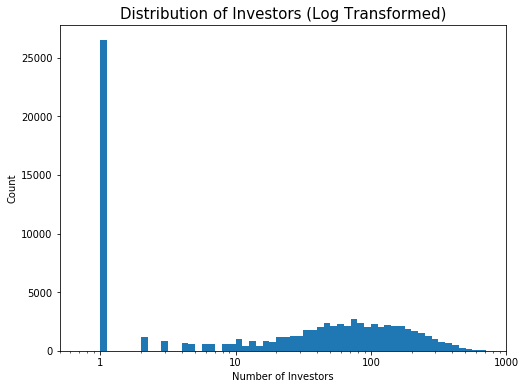

In [33]:
bins = 10 ** np.arange(0, 10, .05)

plt.figure(figsize=[8, 6])
plt.hist(data = prosper_loan, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([1, 1e1, 1e2, 1e3], ['1','10', '100', '1000'])
plt.title('Distribution of Investors (Log Transformed)', size = 15)
plt.xlabel('Number of Investors')
plt.ylabel('Count')
plt.xlim(0.5, 1e3);

### Observations
> - The chart reveals that most loans are sponsored by just one investor. Also, there are some loans sponsored by investors around 100. It can be deduced that borrowers that need small amount of loan can easily get it because there are handful number of investors that can sponsor such loans.

At this point, it would be neccessary to analyse more than one variable in order to have deeper insight of Prosper loan dataset. This will help to fully achieve the objectives of this project.



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Due to difficulty experienced to deduce meaningful information from the first chart plotted in relation to distribution of stated monthly income of borrowers, log transformation was considered for the analysis.
Chart generated from the log transformation revealed that most borrowers are earning around 5,000 dollars, that is between 2,000 and 10,000 dollars. This income range is inline with 'Low' and 'Average income categories.

>Likewisely, investors' chart revealed that most loans are sponsored by just one investor. Also, there are some loans sponsored by investors around 100. It can be deduced that borrowers that need small amount of loan can easily get it because there are handful number of investors that can sponsor such loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>Prosper is an online loan platform which might lead to assumption that days of the week will not be a factor when it comes to listing of borrowers. However, opposite is the case. Monday and Tuesday recorded the highest number of listed borrowers, and the trend moved downward gently to wednesday, Thursday and Friday. A sharp drop was recorded on Saturday and Sunday.



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Bivariate Exploration
---
In this section, we will analyse pairs of variables by starting with quantitative variables and then look into quantitative and qualitative variables. At the end, we will analyse two qualitative variables. All this analysis will help to have deeper understaning of the data and to reveal more insights that would help to achieve the objectives of this project.

To start with, we will do overview analysis using heatmap chart to see the level of correlation of all the variables needed. Afterward, pairwise analysis will be performed to visually see the relationships between these numeric variables.

### Relationships between Quantitative Variables

### Question 1
> Are there relationships between numeric variables or features, and what is their correlation coefficient (r)?

### Visualization

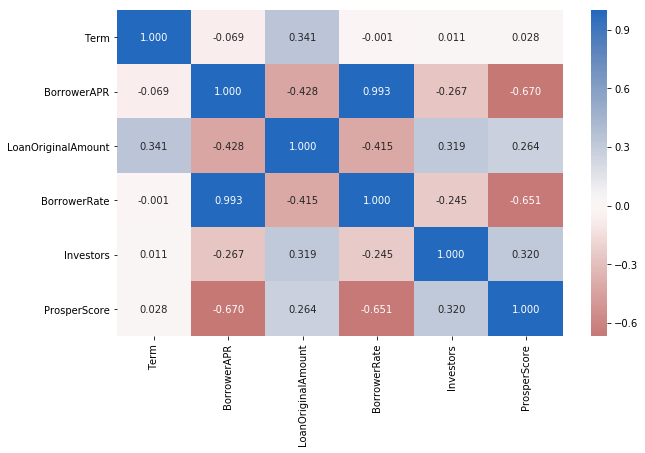

In [34]:
# Heatmap chart to show correlation coefficients of variables
numeric_vars = ['Term','BorrowerAPR','LoanOriginalAmount','BorrowerRate','Investors','ProsperScore']

plt.figure(figsize=[10,6])
sb.heatmap(prosper_loan[numeric_vars].corr(), annot = True, 
           fmt = '.3f',cmap = 'vlag_r', center =0)
plt.show();

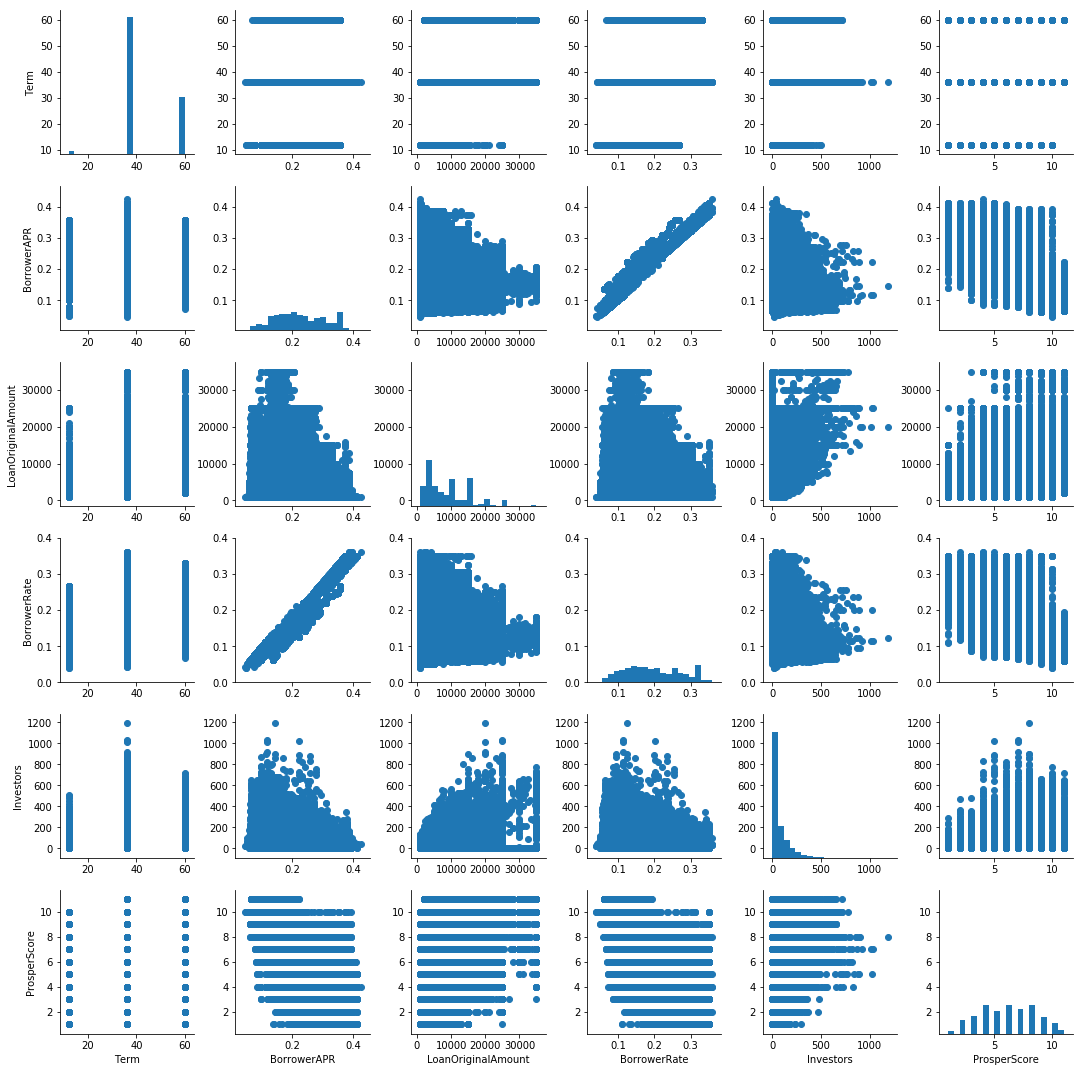

In [35]:
# Pairwise analysis of the selected numeric variables
g = sb.PairGrid(data = prosper_loan, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### Observations
> - Starting from the first variable on the chart. 'Term' has positive relationship with 'LoanOriginalAmouunt' with correlation coefficient of 0.34. The correlation coefficient between 'BorrowerAPR' with 'ProsperScore', and 'LoanOriginalamount' is -0.67 and -0.43 respectively. 
The relationship between 'BorrowerAPR and these variables are negative. Meanwhile 'BorrowerAPR' and 'BorrowerRate have a very strong correlation coefficient of 0.99 that is positive.
'LoanOriginalAmount' and 'BorrowerRate' have correlation coefficient of -0.42 which is negative. 'LoanOriginalAmount' and 'Investors' correlation coefficient is 0.32. Lastly, 'Investors and 'ProsperScore' settles with 0.32 correlation coefficient.

We will move on to analyse with some cleaning how 'BorrowerAPR' correlates with 'BorrowerRate'.

### Question 2
> What is the level of dependence between borrowers' annual percentage rate and borrowers' interest rate?

### Visualization

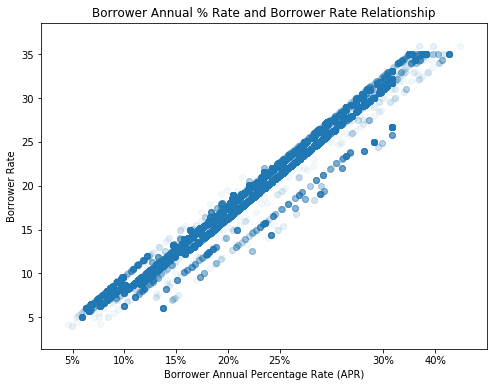

In [36]:
# scatter plot to reveal relationship between 'BorrowerAPR' and 'BorrowerRate'
plt.figure(figsize = [8, 6])

plt.scatter(data = prosper_loan, x = 'BorrowerAPR', y = 'BorrowerRate', alpha = 1/20)

plt.yticks([0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35],
           ['5', '10', '15', '20', '25', '30', '35'])
plt.xticks([0.05, 0.10, 0.15, 0.20, 0.25, 0.35, 0.40],
           ['5%','10%','15%','20%','25%','30%','40%'])
plt.xlabel('Borrower Annual Percentage Rate (APR)')
plt.ylabel('Borrower Rate')
plt.title('Borrower Annual % Rate and Borrower Rate Relationship');

### Observations
> - The borrower's annual percentage rate is highly correlated with borrower's interest rate on each loan taken from Prosper. It is the borrower's interest rate that is used to calculate borrower's annual percentage rate. These rates have direct impact on amount of loan acquired.

To understand deeply the impact of any of these rates on actual loan collected by borrowers, let us look into that in the next analysis.

### Question 3
> How do Borrower Annual Percent Rate (APR) and Borrower Rate  relate with Loan Original Amount?

### Visualization

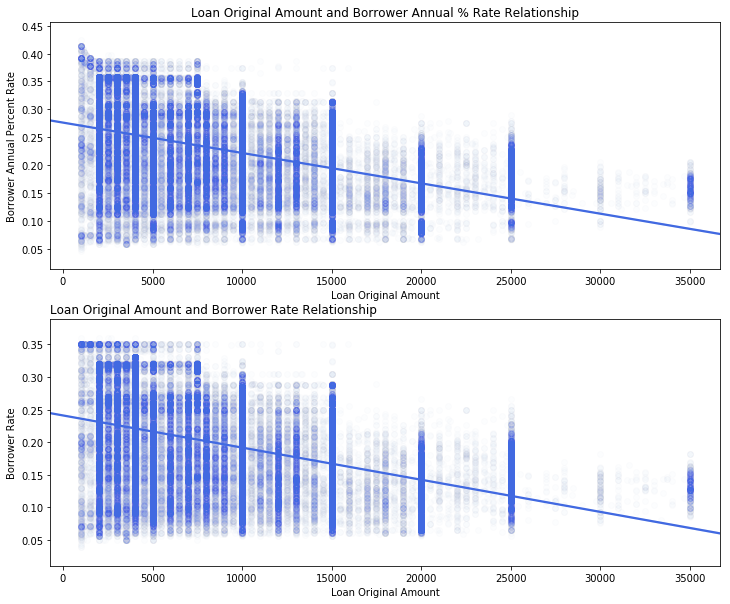

In [37]:
# Relationship between borrower annual percentage rate, borrower rate  and loan original amount

plt.figure(figsize =[12,10])

plt.subplot(2,1,1)
sb.regplot(data = prosper_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR',
            color=color,scatter_kws={'alpha': 1/100})
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Annual Percent Rate')
plt.title('Loan Original Amount and Borrower Annual % Rate Relationship')

plt.subplot(2,1,2)
sb.regplot(data = prosper_loan, x = 'LoanOriginalAmount', y = 'BorrowerRate',
            color=color, scatter_kws={'alpha': 1/100} )
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.title('Loan Original Amount and Borrower Rate Relationship', loc = 'left');

### Observations
> - To be able to understand clearly the relationship that exists between Borrower Annual Percent Rate, Borrower Rate and Loan Original Amount, I have to perform some transparency. In addition to the transparency, the correlation coefficient (r) captures negative linear relationships between Borrower Annual Percent Rate, Borrower Rate and Loan Original Amount.

>This means that an increase in Loan Original Amount, will result to a decrease in Borrower Annual Percent Rate and Borrower Rate. The interpretation of this is that borrowers that are only qualified for small amount of loan will have to pay higher rate on loan facility acquired from Prosper. Relating this with the income categories, the low and average income earners will be negatively affected by this. Meanwhile in variance, borrowers that are in high and very-high income categories will pay lesser rates.

Next analysis will focus on relationship between Loan Original Amount and Investors, also relationship between Investors and Prosper Score

### Question 4
> Does loan amount affect investors decision and how does prosper score affects investors decision?

### Visualization

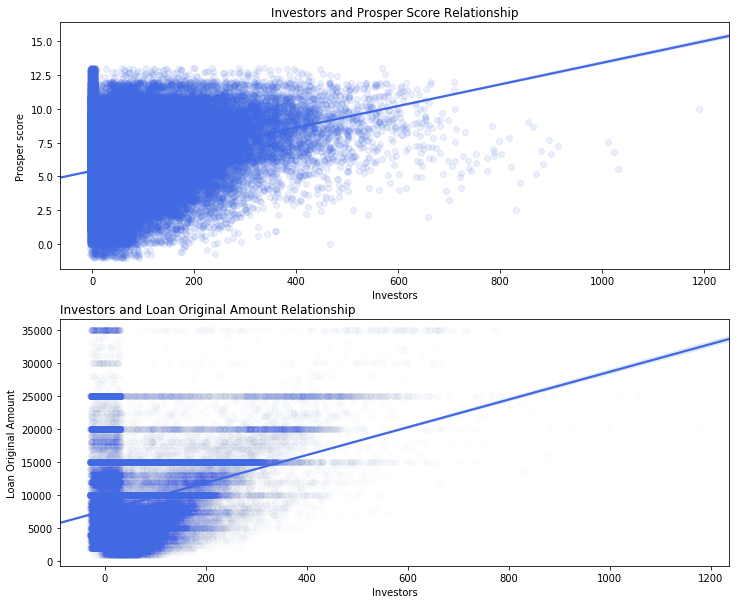

In [38]:
# Investors and prosper score, investors and loan original amount relationships
plt.figure(figsize =[12,10])

plt.subplot(2,1,1)
sb.regplot(data = prosper_loan, x = 'Investors', y = 'ProsperScore',
            color=color,scatter_kws={'alpha': 1/10}, x_jitter = 5, y_jitter = 2)
plt.xlabel('Investors')
plt.ylabel('Prosper score')
plt.title('Investors and Prosper Score Relationship')

plt.subplot(2,1,2)
sb.regplot(data = prosper_loan, x = 'Investors', y = 'LoanOriginalAmount',
            color=color,scatter_kws={'alpha': 1/100}, x_jitter = 30, y_jitter = 10)
plt.xlabel('Investors')
plt.ylabel('Loan Original Amount')
plt.title('Investors and Loan Original Amount Relationship', loc = 'left');

### Observations
> - There is a positive relationship between Prosper Score and Investors. The higher the Prosper Score, the higher the number of investors. This means that investors have confidence in Prosper Score to take investment decisions.
> - Likewisely, Investors and Loan Original Amount are positively correlated. The higher the loan amount the higher the number of investors that will fund the loan. This means that risk is shared among investors not that one or few investors will soley bare the risk of huge amount of loan.

After getting some insights from quantitative variables, let's now shift our attention to relationship between quantitative and qualitative variables. It will be interesting to see how 'ProsperScore' and 'BorrowerAPR' influence 'IncomeCategory.

### Relationships between Quantitative and Qualitative Variables

### Question 5
> Is there relationship between ProsperScore, BorrowerAPR and income category?

### Visualization

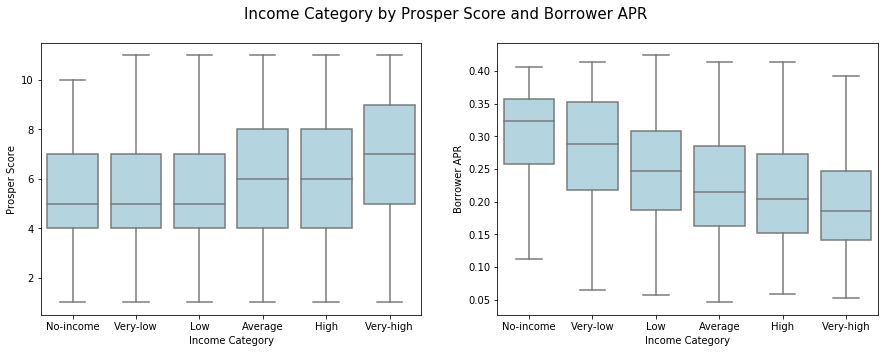

In [39]:
# Box plot charts for 'Income Category' by 'Prosper Score' and 'Borrower APR'
def bor_box():
    plt.figure(figsize = [15, 5])

    plt.subplot(1, 2, 1)
    sb.boxplot(data = prosper_loan, x = 'IncomeCategory', y = 'ProsperScore', color = 'lightblue', showfliers = False)
    plt.xlabel('Income Category')
    plt.ylabel('Prosper Score')
    
    
    plt.subplot(1, 2, 2)
    sb.boxplot(data = prosper_loan, x = 'IncomeCategory', y = 'BorrowerAPR', color = 'lightblue', showfliers = False)
    plt.xlabel('Income Category')
    plt.ylabel('Borrower APR')
    plt.suptitle('Income Category by Prosper Score and Borrower APR', size = 15)
    
bor_box()

### Observations
> - IncomeCategory by ProsperScore chart has shown that ProsperScore is highly influenced by incomeCategory of borrowers. The average borrowers that belongs to No-income, very-low, and low IncomeCategory are scored low while their counterparts in the IncomeCategory of average, high and very-high are scored high.

> - BorrowerAPR which has to do with borrower annualy percent rate is negatively affecting borrowers with no-income or low income. The higher the IncomeCategory of a borrower, the lower the annual percent rate collected form such borrower.
These relationships will certainly influence investors' decision, is also one of the determinant factors of loan amount given and will also contribute to loan outcome status.

in furtherance of this insightful exploration, the next analyses will focus on relationships between ProsperRating(Alpha) and LoanOriginalAmount, IncomeCategory and LoanOriginalAmount, IncomeCategory and Investors, and ProperRating(Alpha) and Investors.

### Question 6
> What insight can you deduce from  ProsperRating(Alpha) and LoanOriginalAmount, IncomeCategory and LoanOriginalAmount, IncomeCategory and Investors, and ProperRating(Alpha) and Investors?

### Visualization
---
In order to be able to see clearly and understand the charts. I used log to transform the y-axes of the charts.

In [40]:
# This is log function to transform 'Investors' and 'LoanOriginalAmount' variables.
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
prosper_loan['Log_Investors'] = prosper_loan['Investors'].apply(log_trans)

prosper_loan['Log_LoanOriginalAmount'] = prosper_loan['LoanOriginalAmount'].apply(log_trans)

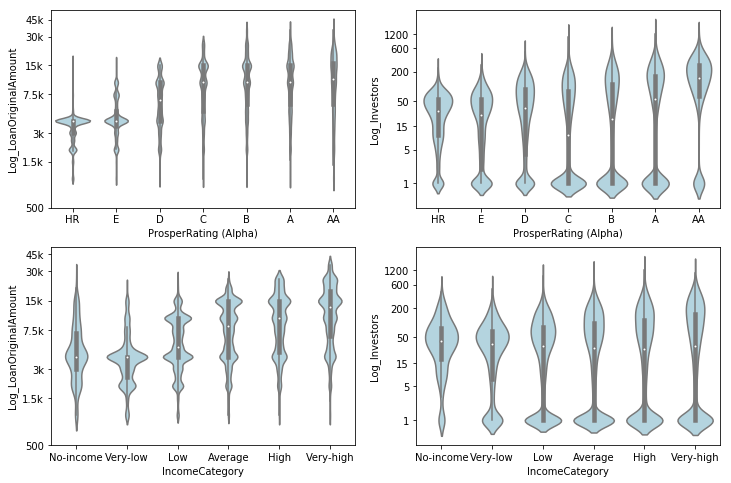

In [41]:
#This function is to plot charts needed to answer question 6
def loan_box():
    numeric_vars2 = ['Log_LoanOriginalAmount','Log_Investors']
    ordered_vars = ['ProsperRating (Alpha)','IncomeCategory']
    
    fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize =[12,8])
    
    for i in range(len(ordered_vars)):
        var = ordered_vars[i]
        sb.violinplot(data = prosper_loan, x = var, y = 'Log_LoanOriginalAmount',
                     ax = ax[i,0], color = 'lightblue')
        ax[i,0].set_yticks(log_trans(np.array([500.0, 1.5e3, 3e3, 7.5e3, 1.5e4, 3e4, 4.5e4])))
        ax[i,0].set_yticklabels(['500','1.5k','3k','7.5k','15k','30k','45k'])
        
        sb.violinplot(data = prosper_loan, x = var, y = 'Log_Investors',
                     ax = ax[i,1], color = 'lightblue')
        ax[i,1].set_yticks(log_trans(np.array([ 1, 5, 15, 50, 200, 600, 1200])))
        ax[i,1].set_yticklabels(['1', '5', '15', '50', '200', '600', '1200'])
        
        
loan_box()

### Observations
> - Pertaining to ProsperRating(Alpha) and LoanOriginalAmount; the lowly rated borrowers with HR and E ratings mostly acquire loan around 5,000 dollars. Compared to other borrowers rated higher. Borrowers with D, C, B, A, and AA ratings have their average population acquiring loan around 7,500 dollars upward. This means that ProsperRating(Alpha) has a significant impact in loan outcome status and amount each borrower can possibly access.

> - IncomeCategory and LoanOriginal also revealed that borrowers within the category of no-income, and very_low can usually access loan amount around 5,000 dollars. Meanwhile the average population of borrowers within the income category of low, average, high, and very-high can access as high as 10,000 dollars, 20,000 dollars, 25,000 dollars and 30,000 dollars respectively.

> - ProsperRating(Alpha) and Investors are also insightful. The lowest rated borrowers (HR) hardly registered 1 investor solely taking the risk to invest in borrowers rated so low. Most investors investing in borrowers rated so low are around 50 - 100 investors. Compared to borrowers rated E, D, C, B, A, and AA that have many sole investors that could take the risk of investing just because of ProsperRating. ProsperRating(Alpha) highly influence investors' decision.

> - IncomeCategory and Investor is closely similar to ProsperRating(Alpha) and Investors. Investors are mostly willing to invest their money on borrowers with income, especially from average income category upward.

It will be good to look at relationships between qualitative variables which will be our next insighful analysis.

### Relationships between Qualitative Variables

### Question 7
> What is the distribution of home-owners in relation to Prosper rating and  income categories?

### Visualization

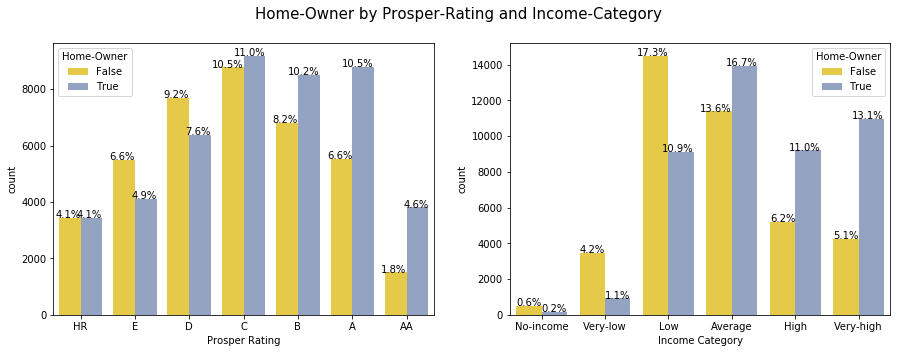

In [42]:
# Plotting bar charts for ProsperRating(Alpha) and IncomeCategory Using IsBorrowerHomeowner as hue 
plt.figure(figsize=(15,5))

total = int(len(prosper_loan))

# first plot
plt.subplot(1,2,1)
ax = sb.countplot(data = prosper_loan, x = 'ProsperRating (Alpha)', hue ='IsBorrowerHomeowner', palette = 'Set2_r')
ax.get_legend().set_title('Home-Owner')
plt.xlabel('Prosper Rating')

# Labeling the bars with their percent value
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', size = 10)

# second plot
plt.subplot(1,2,2)
ax = sb.countplot(data = prosper_loan, x = 'IncomeCategory', hue ='IsBorrowerHomeowner', palette = 'Set2_r')
ax.get_legend().set_title('Home-Owner')
plt.xlabel('Income Category')

# Labeling the bars with their percent value
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', size = 10)
plt.suptitle('Home-Owner by Prosper-Rating and Income-Category', size = 15)
plt.show()

### Observations
> - It is quite facinating to observe that there is clear demarcation in ProsperRating(Alpha) in relation to home owners. Lowly rated borrowers from HR, E to D showed a distinct pattern different from averagely or highly rated borrowers from C, B, A, to AA. Among the lowly rated borrowers, borrowers that are not home owners are more than borrowers that own home. Inversely, more borrowers from the averagely to the highly rated own homes. This insight might be a reflection of income class of the borrowers. In order to confirm this, second chart was plotted showing distribution of home owners in relation to income categories.
This second chart revealed the same pattern just like the first chart. Most borrowers categorized as No-income, Very-low, and low are not home owners. Meanwhile most borrowers categorized as Average, High, and Very-high own home. This might be seen as an advantage to borrowers that own home or landed properties to have favourable loan outcome or be able to influence investors to finance their loan request. However, getting loan from Prosper does not require owning a landed property or owning a home.

To roundup the bivariate analyses, let's look at how investors are distributed accross the states. 

### Question 7
> How are investors distributed across the states?

### Visualization

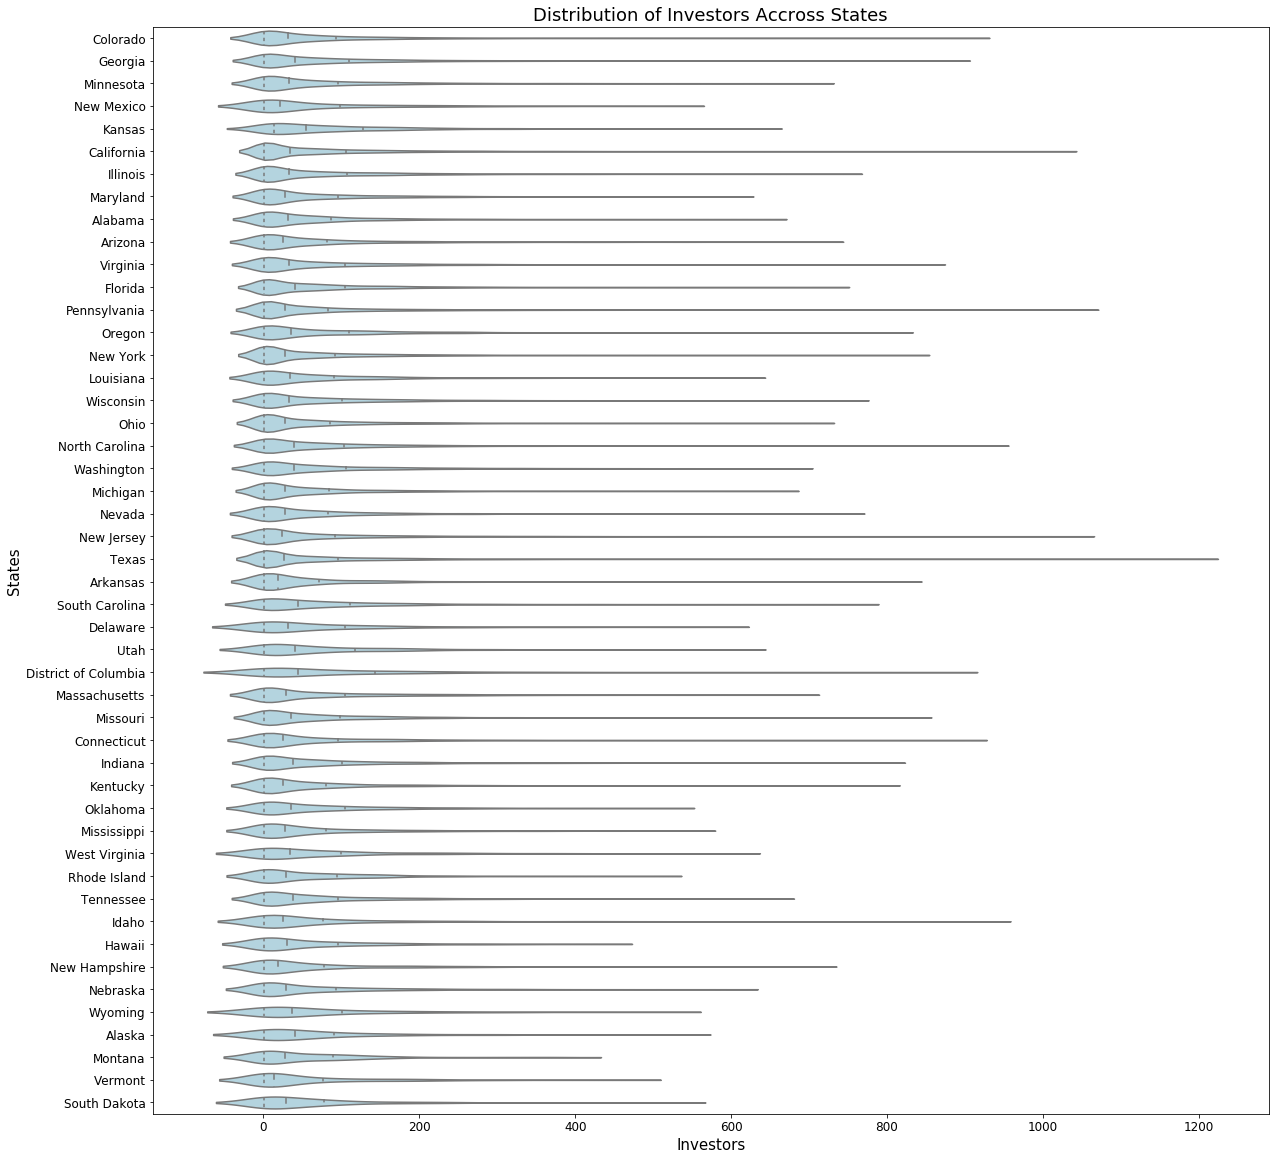

In [43]:
# Chart to reveal distribution of investors accross states
plt.figure(figsize = [20,20])
sb.violinplot(data = prosper_loan.sample(10000, replace = False), y= prosper_loan['State'], 
              x = prosper_loan['Investors'], color = 'lightblue', inner = 'quartile')
plt.xlabel('Investors', size = 15)
plt.ylabel('States', size = 15)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title('Distribution of Investors Accross States', size = 18);

### Observations
> - It is amazing to realise that states with highest number of investors are concentrated in western and eastern part of USA. Texas is located in the Southwestern part of the country, Pennsylvania in Mideast, New Jersey in Mideast as well, California in Far West, District of Columba in Mideast, Connecticut in New England region are the states with highest number of investors. This pattern is quite different from distribution of borrowers from state analysed in the univariate section. Surprisingly, only Texas and California are among the states with highest borrowers.

If bivariate analyses conducted could be this revealing, multivariate analyses will possibly unfold more insights. Let's now look at some analyses with more variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  The correlation coefficient (r) analysis performed to reveal the relationships between BorrowerAPR vs. LoanOriginalAmount, and BorrowerRate vs. LoanOriginalAmount captures negative linear relationships.
This means that an increase in Loan Original Amount, will result to a decrease in BorrowerAPR and BorrowerRate. The interpretation of this is that borrowers that are only qualified for small amount of loan will have to pay higher rate on loan facility acquired from Prosper. Relating this with the income categories, the low and average income earners will be negatively affected by this. Meanwhile in variance, borrowers that are in high and very-high income categories will pay lesser rates.

> Similar analysis performed on ProsperScore and Investors, showed positive relationship. The higher the ProsperScore, the higher the number of investors. This means that investors have confidence in ProsperScore to take investment decisions.

>Likewisely, Investors and LoanOriginalAmount are positively correlated. The higher the loan amount the higher the number of investors that will fund the loan. This means that risk is shared among investors not that one or few investors will soley bare the risk of huge amount of loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is quite facinating to observe that there is clear demarcation in ProsperRating(Alpha) in relation to home owners. Lowly rated borrowers from HR, E to D showed a distinct pattern different from averagely or highly rated borrowers from C, B, A, to AA. Among the lowly rated borrowers, borrowers that are not home owners are more than borrowers that own home. Inversely, more borrowers from the averagely to the highly rated own homes. This insight might be a reflection of income class of the borrowers. In order to confirm this, second chart was plotted showing distribution of home owners in relation to income categories. This second chart revealed the same pattern just like the first chart. Most borrowers categorized as No-income, Very-low, and low are not home owners. Meanwhile most borrowers categorized as Average, High, and Very-high own home. This might be seen as an advantage to borrowers that own home or landed properties to have favourable loan outcome or be able to influence investors to finance their loan request. However, getting loan from Prosper does not require owning a landed property or owning a home.

## Multivariate Exploration

> In this section we will look deeper into our variables by analysing not fewer than three variables per chart. This will reveal more insights that can be helpful to achieve our objectives. Some of the variables that will be analysed are 'ProsperRating (Alpha)', 'IncomeCategory', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'AmountDelinquent', 'IsBorrowerHomeowner', 'Investors' and more

### Question 1
> - What are the findings between 'IncomeCategory' by 'ProsperRating (Alpha)' and 'StatedMonthlyIncome'?
> - What are the findings between 'IncomeCategory' by 'ProsperRating (Alpha)' and 'LoanOriginalAmount'?
> - What are the findings between 'IncomeCategory' by 'ProsperRating (Alpha)' and 'AmountDelinquent'?

### Visualization

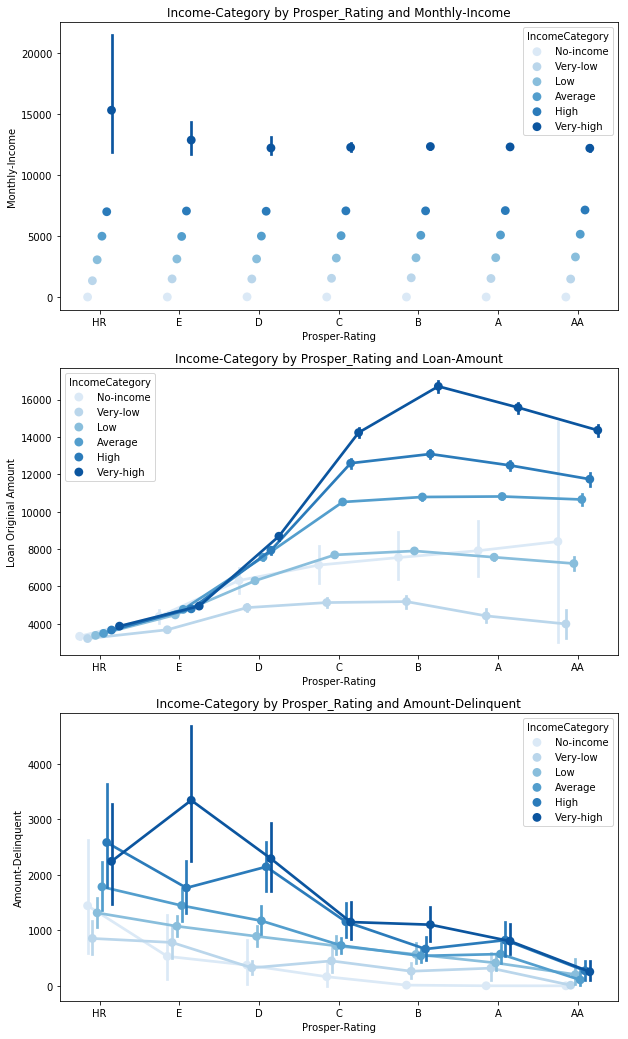

In [44]:
"""Plot for showing relationships between IncomeCategory, 
ProsperRating, StatedMonthlyIncome, LoanOriginalAmount and AmountDelinquent"""

plt.figure(figsize = [10,18])

plt.subplot(3,1,1)
sb.pointplot(data = prosper_loan, x = 'ProsperRating (Alpha)', 
             y = 'StatedMonthlyIncome', hue = 'IncomeCategory', 
              linestyles = "", dodge = 0.3, palette = 'Blues')
plt.xlabel('Prosper-Rating')
plt.ylabel('Monthly-Income')
plt.title('Income-Category by Prosper_Rating and Monthly-Income')

plt.subplot(3,1,2)
sb.pointplot(data = prosper_loan, x = 'ProsperRating (Alpha)', 
             y = 'LoanOriginalAmount', hue = 'IncomeCategory', 
             dodge = 0.5, palette = 'Blues')
plt.xlabel('Prosper-Rating')
plt.ylabel('Loan Original Amount')
plt.title('Income-Category by Prosper_Rating and Loan-Amount')

plt.subplot(3,1,3)
sb.pointplot(data = prosper_loan, x = 'ProsperRating (Alpha)', 
             y = 'AmountDelinquent', hue = 'IncomeCategory', 
             dodge = 0.3, palette = 'Blues')
plt.xlabel('Prosper-Rating')
plt.ylabel('Amount-Delinquent')
plt.title('Income-Category by Prosper_Rating and Amount-Delinquent');


### Observations
> - It is totally unbelieveble to see in the first chart that borrower with the highest monthly income that also qualifies to belong to very-high class in terms of income category has the lowest prosper rating. The trend is maintained for the three lowest rate categories according to ProsperRating(Alpha). Such a borrower with very-high income but also with lowest rate might find it difficult to acquire loan or for investors to be willing to finance such borrower's loan .

> - It is also worthy to note in the middle chart that those borrowers classified as 'No-income' in 'IncomeCategory' but rated from D, C, B, A, and AA in 'ProsperRating(Alpha)', received more loan amount on the average than borrowers that belong to 'Very-low' and 'Low' in the 'IncomeCategory'. Also, the third best rated (B) borrowers according to 'ProsperRating(Alpha)' received highest amount of loan.

> - The third chart on amount of loan delinquent is not too surprising because patterns revealed is what should be expected. The lowest rated borrowers according to 'ProsperRating(Alpha)' recorded the highest amount of loan delinquent. Just that borrowers rated second lowest recorded more loan delinquent than the lowest rated borrowers.

Next chart will focus on 'LoanOriginalAmount', 'Term' and EmploymentStatus' for more jaw dropping insights

### Question 2
> - What are the findings between 'LoanOriginalAmount' by 'EmploymentStatus'  and 'Term'?

### Visualization

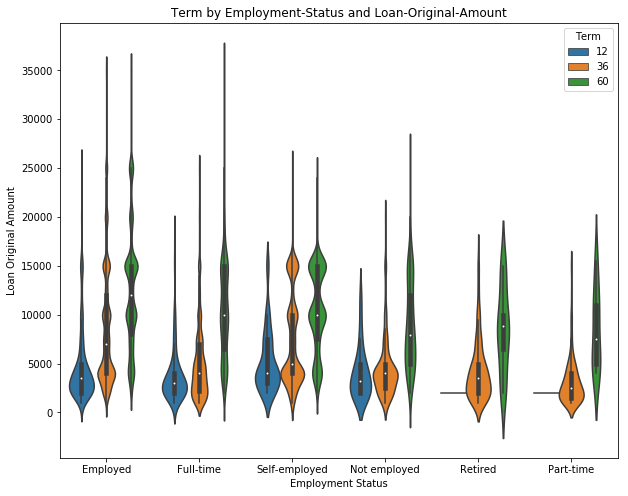

In [45]:
plt.figure(figsize =[10,8])

sb.violinplot(data = prosper_loan.query('EmploymentStatus != "Other"'), x = 'EmploymentStatus', y = 'LoanOriginalAmount',
          hue = 'Term')
plt.xlabel('Employment Status')
plt.ylabel('Loan Original Amount')
plt.title('Term by Employment-Status and Loan-Original-Amount');

### Observations
> - Borrowers in the employment status categories from 'Employed', 'Full-time', Self-employed', to 'Not employed' were mostly given loan around 5,000 dollars and these loans were short-term (12 months) and mid-term (36 months loan). Borrowers that are 'Retired', and 'Part-time' recorded no or little short-term loan. Long-term loans of 60 months around 10,000 dollars to 40,000 dollars were mostly offered to borrowers that are 'Employed' or/and 'Full-time'.
This analysis has shown that employment status of borrowers as impact on amount of loan and loan term. combination of these features will affect loan outcome, amount of loan,and influence investors' decision on borrowers to invest on.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is also worthy to note that borrowers classified as 'No-income' in 'IncomeCategory' but rated from D, C, B, A, and AA in 'ProsperRating(Alpha)' received more loan amount on the average than borrowers that belong to 'Very-low' and 'Low' in the 'IncomeCategory'. Also, the third best rated (B) borrowers according to 'ProsperRating(Alpha)' received highest amount of loan.

> Also, amount of loan delinquent is not too surprising because patterns revealed is what should be expected. The lowest rated borrowers according to 'ProsperRating(Alpha)' recorded the highest amount of loan delinquent. Just that borrowers rated second lowest recorded more loan delinquent than the lowest rated borrowers.


### Were there any interesting or surprising interactions between features?

> It is totally unbelieveble to see that borrower with the highest monthly income that also qualifies to belong to very-high class in terms of income category has the lowest prosper rating. The trend is maintained for the three lowest rate categories according to ProsperRating(Alpha). Such borrowers with very-high income but also with lowest rate might find it difficult to acquire loan or for investors to be willing to finance such borrowerss loan.

## Conclusions
---
This project has successfully revealed factors affecting loan's outcome status, point out factors loan amount is based and been able to determine factors influencing investors' decision on loan to invest in. These were made possible through various types of analyses that are univariate, bivariate and multivariate.

> It was amazing to realise that borrowers are likely to be listed on Mondays, Tuesdays, Wednesdays, Thursdays, and Fridays respectively than Saturdays and Sundays despite that Prosper loan is an online platform. Also, Income category, employment status, monthly income and amount delinquent all contribute to Prosper score and Prosper rating which are determinant factors affecting loan's outcome status.

> Loan amount approved to borrowers varies and are majorly based on Prosper rating, income range or category, and employment status of borrower. Loan amount approved to borrower is determinant factor affecting borrower rate and borrower annual percent rate. loan amount also influences payment duration or term of loan. Small loan amount are 12 months while 36 months is for mid range loan amount and lastly, loan amount that is high is attached to 60 months term.

> Investors' decision are majorly influenced by Prosper score, prosper rating followed by employment status of borrower and loan amount. Most of the investors prefer to invest in loan amount around 5,000 dollars, also most investors prefer to invest in loans that has 36 months term. Borrowers that are employed on full time are the first choice of investors compared to borrowers that are retired or engaged in part-time job.

Various analyses carried out in this project were able to unveil that states with high number of borrowers are evenly distributed accross USA while states with high number of investors are clustered in eastern part of the country. Despite that owning a home is not a requirement for getting loan. Prosper rating revealed that most of the lowly rated borrowers are not home owners while most of the highly rated borrowers are home owners.

This project has shown some gaps that require further analyses or findings. Some of the gaps are borrowers are more listed on Monday through Thursday than weekend days despite that the loan platform is an online platform. Secondly, investors are clustered in the eastern part of the country. There must be some reasons to these gaps.